# Topic: “Is online education growing in demand versus traditional classroom education?”
Elementary and secondary public school revenues totaled $632 billion in school year 2013–14. Of this total, 9 percent of revenues were from federal sources, 46 percent were from state sources, and 45 percent were from local sources.

In school year 2013 / 14, elementary and secondary public school revenues totaled 632 billion, in constant 2015–16 dollars.1 Of this total, 9 percent, or 55 billion, were from federal sources; 46 percent, or 292 billion, were from state sources; and 45 percent, or 284 billion, were from local sources. In 2013–14, the percentages from each source differed across the states and the District of Columbia. For example, the percentages of total revenues coming from federal, state, and local sources in Illinois were 8 percent, 26 percent, and 66 percent, respectively, while the same total revenues in Vermont were 6 percent, 90 percent, and 4 percent.
Total elementary and secondary public school revenues were 7 percent higher in 2013–14 than in 2003–04 (632 billion versus 592 billion, in constant 2015–16 dollars). During this time, total revenues rose from 592 billion in 2003–04 to $658 billion in 2007–08 and then fell each year between 2008–09 and 2012–13. Total revenues then rose from 622 billion in 2012–13 to 632 billion in 2013–14. These changes were accompanied by a 3 percent increase in total elementary and secondary public school enrollment, from 49 million students in 2003–04 to 50 million students in 2013–14 (see indicator Elementary and Secondary Enrollment).

In [26]:
import logging
logging.basicConfig(level=logging.DEBUG)

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [29]:
import os
print(os.getcwd())

/Users/Cindy/Desktop/AAE STUFF/11_ repython_bellevue_21stfeb


In [35]:
os.listdir(os.getcwd())

['elsect_summary copy.csv',
 'Untitled.ipynb',
 'DSC 530 Final Cindy Herrera.ipynb',
 'Bellevue.ipynb',
 'Bellevue.docx',
 '.ipynb_checkpoints']

In [34]:
# Imprting dataset
df_educ = pd.read_csv("⁨/Users/Cindy/Desktop/AAE STUFF/11_ repython_bellevue_21stfeb/elsect_summary.csv")

FileNotFoundError: File b'\xe2\x81\xa8/Users/Cindy/Desktop/AAE STUFF/11_ repython_bellevue_21stfeb/elsect_summary.csv' does not exist

In [24]:
print(df_educ.shape)
print(df_educ.nunique())

NameError: name 'df_educ' is not defined

In [12]:
# Looking Data types and nulls
print(df_educ.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374161 entries, 0 to 374160
Data columns (total 13 columns):
STATE       374161 non-null object
ENROLL      358293 non-null float64
NAME        374161 non-null object
YRDATA      374161 non-null int64
TOTALREV    374161 non-null int64
TFEDREV     374161 non-null int64
TSTREV      374161 non-null int64
TLOCREV     374161 non-null int64
TOTALEXP    374161 non-null int64
TCURINST    374161 non-null int64
TCURSSVC    374161 non-null int64
TCURONON    358293 non-null float64
TCAPOUT     374161 non-null int64
dtypes: float64(2), int64(9), object(2)
memory usage: 37.1+ MB
None


## Starting the exploration

KeyError: 'TOTAL_REVENUE'

DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


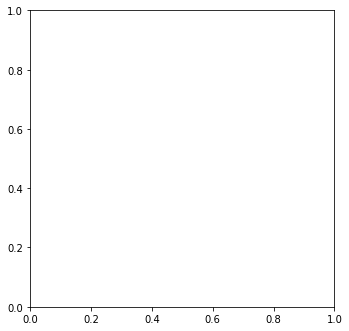

In [28]:
plt.figure(figsize = (12,12))
plt.subplot(221)
g1 = sns.kdeplot(df_educ['TOTAL_REVENUE'], color='g')
g1 = sns.kdeplot(df_educ['TOTAL_EXPENDITURE'],color='r')
g1 = sns.kdeplot(df_educ['ENROLL'].dropna(), color='y')

plt.subplot(222)
g2 = sns.kdeplot(df_educ['FEDERAL_REVENUE'], color='g')
g2 = sns.kdeplot(df_educ['STATE_REVENUE'],color='r')
g2 = sns.kdeplot(df_educ['LOCAL_REVENUE'],color='y')

plt.subplot(223)
g3 = sns.kdeplot(df_educ['INSTRUCTION_EXPENDITURE'].dropna(), color='g')
g3 = sns.kdeplot(df_educ['SUPPORT_SERVICES_EXPENDITURE'],color='r')

plt.subplot(224)
g4 = sns.kdeplot(df_educ['OTHER_EXPENDITURE'].dropna(),color='y')
g4 = sns.kdeplot(df_educ['CAPITAL_OUTLAY_EXPENDITURE'],color='b')


plt.subplots_adjust(wspace = 0.4, hspace = 0.2,top = 0.9)
plt.show()

In [18]:
# Creating a new variable REVENUE- EXPENDITURE

In [ ]:
df_educ['AMOUNT_FINAL'] = df_educ["TOTAL_REVENUE"] - df_educ["TOTAL_EXPENDITURE"]

plt.figure(figsize = (8,5))
g = sns.kdeplot(df_educ['AMOUNT_FINAL'],color='b')
plt.show()

In [ ]:
df_educ['REGION'] = np.nan

df_educ.loc[df_educ.STATE.isin(['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 
                                'Rhode Island','Vermont','New Jersey', 'New York',
                                'Pennsylvania']), 'REGION'] = 'Northweast'

df_educ.loc[df_educ.STATE.isin(['Illinois', 'Indiana', 'Michigan', 'Ohio','Wisconsin','Iowa', 'Kansas', 
                                'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 
                                'South Dakota']), 'REGION'] = 'Midwest'

df_educ.loc[df_educ.STATE.isin(['Delaware', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 
                                'South Carolina', 'Virginia','District of Columbia','West Virginia',
                                'Alabama', 'Kentucky', 'Mississippi', 'Tennessee', 
                                'Arkansas', 'Louisiana', 'Oklahoma', 'Texas']), 'REGION'] = 'South'

df_educ.loc[df_educ.STATE.isin(['Arizona','Colorado', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 
                                'Utah','Wyoming','Alaska', 'California', 'Hawaii', 'Oregon',
                                'Washington']), 'REGION'] = 'West'

## Visual look by:
TOTAL REVENUE
TOTAL EXPENDITURE
FINAL AMOUNT

In [ ]:
fig, ax = plt.subplots(1,3, sharex=False, sharey=True, 
                       figsize = (15,28))
ax = ax.flatten()

g = sns.boxplot(x="TOTAL_REVENUE",y="STATE", data=df_educ,ax=ax[0])
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_title("TOTAL REVENUE BY STATE", fontsize=15)
g.set_xlabel("Revenue(log)", fontsize=12)
g.set_ylabel("States", fontsize=12)

g1 = sns.boxplot(x="TOTAL_EXPENDITURE",y="STATE", data=df_educ,ax=ax[1])
g1.set_xticklabels(g.get_xticklabels(),rotation=90)
g1.set_title("TOTAL EXPENDITURE BY STATE", fontsize=15)
g1.set_xlabel("Expenditure(log)", fontsize=12)
g1.set_ylabel("States", fontsize=12)

g2 = sns.boxplot(x="AMOUNT_FINAL",y="STATE",data=df_educ,ax=ax[2])
g2.set_xticklabels(g.get_xticklabels(),rotation=90)
g2.set_title("REV x EXPEND FINAL AMOUNT", fontsize=15)
g2.set_xlabel("Final Amount(US)", fontsize=12)
g2.set_ylabel("States", fontsize=12)

plt.subplots_adjust(wspace = 0.2, hspace = 0.8,top = 0.9)

plt.show()

In [ ]:
state_amount_final = df_educ.groupby("STATE")['AMOUNT_FINAL'].mean()
print("Total of States with positive final Result")
print((state_amount_final > 0).sum())

It's very interesting to see that many States have high negative final amounts.
Why california, New York and Texas have so negative values?
Why Indiana have highest positive final amount them anothers?

Knowing the FINAL AMOUNT by YEAR

In [ ]:
year_amount_final = df_educ.groupby("YEAR")['AMOUNT_FINAL'].mean()

print("Positive final results since 92")
print((year_amount_final > 0).sum())

plt.figure(figsize = (15,6))
g = sns.barplot(x="YEAR", y="AMOUNT_FINAL",data=df_educ)
g.set_title("Final Result REVENUE X EXPENDITURE", fontsize=15)
g.set_xlabel("Years ", fontsize=12)
g.set_ylabel("Net Income", fontsize=12)

plt.show()

Let's add one column with the respective the President by Period

In [ ]:
df_educ["President"] = np.nan

df_educ.loc[df_educ["YEAR"] <= 2000,"President"] = 'Bill Clinton'
df_educ.loc[(df_educ["YEAR"] > 2000) & (df_educ["YEAR"] <= 2009),"President"] = 'George Bush'
df_educ.loc[(df_educ["YEAR"] > 2009),"President"] = 'Barack Obama'

print(df_educ['President'].value_counts())

In [ ]:
Bill = df_educ[df_educ["President"] == "Bill Clinton"]
Bush = df_educ[df_educ["President"] == "George Bush"]
Obama = df_educ[df_educ["President"] == "Barack Obama"]

plt.figure(figsize = (16,6))
plt.subplot(121)
g1 = sns.kdeplot(Bill['FEDERAL_REVENUE'], color='g')
g1 = sns.kdeplot(Bush['FEDERAL_REVENUE'], color='r')
g1 = sns.kdeplot(Obama['FEDERAL_REVENUE'], color='b')

plt.subplot(122)
g1 = sns.distplot(Bill['ENROLL'].dropna(), color='g')
g1 = sns.distplot(Bush['ENROLL'].dropna(), color='r')
g1 = sns.distplot(Obama['ENROLL'].dropna(), color='b')

plt.show()

In [ ]:
plt.figure(figsize = (10,6))
g = sns.kdeplot(Bill['AMOUNT_FINAL'], color='g')
g = sns.kdeplot(Bush['AMOUNT_FINAL'], color='r')
g = sns.kdeplot(Obama['AMOUNT_FINAL'], color='b')

Curious result. Clinton Government have better results than Bush and Obama

Exploring the States ENROLLS and AMOUNT_FINAL separeted by President's period

In [ ]:
df_educ['revenue_per_student'] = df_educ['TOTAL_REVENUE'] / len(df_educ['ENROLL'])
df_educ['expend_per_student'] = df_educ['TOTAL_EXPENDITURE'] /  len(df_educ['ENROLL'])

Bill = df_educ[df_educ["President"] == "Bill Clinton"]
Bush = df_educ[df_educ["President"] == "George Bush"]
Obama = df_educ[df_educ["President"] == "Barack Obama"]

In [ ]:
plt.figure(figsize =( 22,15))

g = sns.lmplot(x="YEAR",y='revenue_per_student', 
           data=df_educ, col="President",sharey=True)
plt.show()

# Conclusion
California, New York and Texas have the highest amounts to education.

We can see a lot of interesting values... Why some states have positive final amounts and almost all have negative values?

We can see differences in investments by president... Why this differences? Maybe it's because Democracts x Republicans States? Better adminstrations?